In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("data/credito_clientes.csv")

In [3]:
df.set_index("ID", inplace=True)

In [4]:
df.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
798fc410-45c1,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
8a8c8f3b-8eb4,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
85698822-43f5,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
0737c11b-be42,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
3b7f77cc-dbc0,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Exercício 1
Explore a base de dados e verifique se ha contas repetidas.

In [6]:
df[df.duplicated()]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
42009c72-651f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73ed1381-3a3f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4f95b36b-ab10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8d3a2576-a958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d5aeb496-64e5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90330d02-82d9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f07d720c-0262,220000,1,1,42,1,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [7]:
print(f"Há {df[df.duplicated()].shape[0]} observações repetidas.")

Há 361 observações repetidas.


## Exercício 2
Se for caso, examine os IDs repetidos, e crie uma nova com os dados corrigidos.

In [8]:
df_duplicados = df[df.duplicated()].reset_index()

In [9]:
df_duplicados.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,...,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,27506.925208,0.188366,0.204986,4.282548,-0.235457,-0.232687,-0.232687,-0.232687,-0.232687,19.498615,...,12.573407,12.573407,12.573407,8.002770,8.002770,8.002770,8.002770,8.002770,8.002770,0.027701
std,82991.904436,0.535390,0.559839,11.396293,0.651891,0.684053,0.684053,0.684053,0.684053,179.984677,...,123.515567,123.515567,123.515567,88.249095,88.249095,88.249095,88.249095,88.249095,88.249095,0.164342
min,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500000.000000,3.000000,2.000000,49.000000,2.000000,4.000000,4.000000,4.000000,4.000000,2500.000000,...,1650.000000,1650.000000,1650.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1.000000


In [10]:
df.drop_duplicates().describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,29639.000000,29639.000000,29639.00000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000,...,29639.000000,29639.00000,29639.000000,29639.000000,2.963900e+04,29639.000000,29639.000000,29639.000000,29639.000000,29639.000000
mean,167444.909747,1.853369,1.55211,35.484261,-0.131617,-0.163501,-0.219137,-0.264280,-0.288707,51263.378926,...,43312.403455,40370.03293,38948.884544,5681.593711,5.926631e+03,5237.314012,4834.164547,4812.564088,5227.025507,0.221060
std,129723.917076,0.789608,0.52198,9.216456,1.196238,1.195930,1.166972,1.131852,1.149446,73607.877625,...,64304.262212,60813.69793,59614.720598,16627.868358,2.312305e+04,17662.875815,15618.230899,15322.533122,17811.009256,0.414968
min,0.000000,0.000000,0.00000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3607.000000,...,2375.500000,1792.50000,1271.000000,1000.000000,8.500000e+02,392.000000,300.000000,264.000000,132.500000,0.000000
50%,140000.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22458.000000,...,19087.000000,18140.00000,17129.000000,2106.000000,2.010000e+03,1810.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67174.000000,...,54610.000000,50301.50000,49316.500000,5011.000000,5.000000e+03,4523.500000,4026.500000,4059.000000,4003.000000,0.000000
max,1000000.000000,6.000000,3.00000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

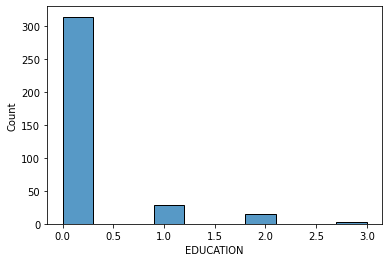

In [11]:
sns.histplot(data=df_duplicados, x="EDUCATION")

<AxesSubplot:xlabel='AGE', ylabel='Count'>

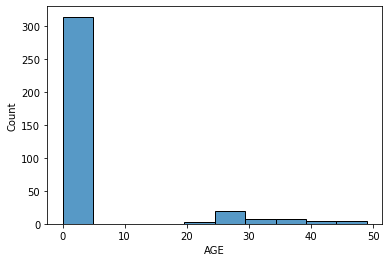

In [12]:
sns.histplot(data=df_duplicados, x="AGE")

Há uma quantidade enorme de dados faltantes na base duplicada. Na variável `AGE`, por exemplo, há várias observações com idade 0, mesmo não sendo possível. Por isso, creio que os dados faltantes, comumente representados por `NaN`, nesta base, estão substituídos pelo valor zero. 

In [13]:
new_df = df.drop_duplicates().reset_index()

## Exercício 3
Continuando a exploração dos dados, analise o tipo da variável `PAY_1`. Discuta se ha algum problema e como corrigir.

A variável `PAY_1` é o histórico de pagamentos do mês de setembro.

<AxesSubplot:xlabel='PAY_1', ylabel='Count'>

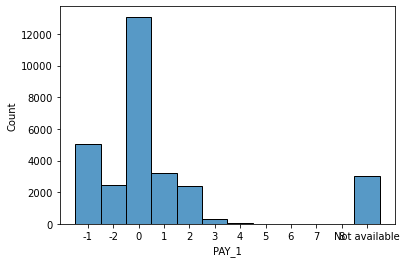

In [14]:
sns.histplot(data=new_df.sort_values("PAY_1"), x="PAY_1")

Cartões de crédito normalmente definem duas datas: a data de fechamento da fatura, em que todas as compras até ali são compiladas e enviadas para o usuário; e a data de vencimento da fatura, que é o limite para o pagamento.

Na variável `PAY_1`, temos 3 valores que não se encaixam na descrição:
- Not available: para esse caso, suponho que a fatura do mês não tinha sido fechada ainda.
- 0: $PAY\_1 == -1$ significa que foi paga até da data de vencimento, e $PAY\_1 == 1$ pagamento atrasado em um mês. Portanto, suponho que o pagamento não tinha sido feito ainda. Ou seja, a fatura estava fechada, mas não estava paga e nem atrasada.
- -2: Uma possivel explicação seria que não havia nenhum pagamento a se fazer.

É necessário, portanto, verificar se essas hipóteses batem com a confecção do dataframe ou se foi algum erro/problema. 

In [15]:
new_df.shape[0]

29639

In [16]:
new_df.query(
    "PAY_1 != 'Not available'"
    "& PAY_1 != '0' "
    "& PAY_1 != '-2'"
).shape[0]/new_df.shape[0]

0.3734606430716286

Como a variável reposta assume uma distribuição Bernoulli, a média é um estimador para a probabilidade de fraude.

In [17]:
new_df.query(
    "PAY_1 != 'Not available'"
    "& PAY_1 != '0' "
    "& PAY_1 != '-2'"
)['default payment next month'].mean()

0.35242569337790225

In [18]:
new_df['default payment next month'].mean()

0.22106008974661764

Na prática, para a hipótese em que não temos informações sobre o pagamento do mês atual, poderíamos deslocar os valores da seguinte maneira:
- `PAY_1` assume o valor da variável `PAY_2`
- `PAY_2` assume o valor da variável `PAY_3`
- ...
- Na última, colocamos algum valor que identifique ausência de informação, diferente dos valores que já temos da variável.


A probabilidade de fraude aumenta quando retiramos esses dados. Isso nos diz que os IDs desses valores tem pagamento no prazo.

Outra alternativa, seria fazer uma média de ponderada dos status de pagamento dos meses anteriores, valorizando mais (pesos maiores) os meses próximos e desvalorizando (pesos menores) para os meses distantes.

Por isso, é necessário analisar o impacto que essa remoção teria conforme o modelo utilizado.

## Exercício 4
1. Plote os histogramas de `AGE` e `LIMIT_BAL`, e calcule as médias e variâncias

<AxesSubplot:xlabel='AGE', ylabel='Count'>

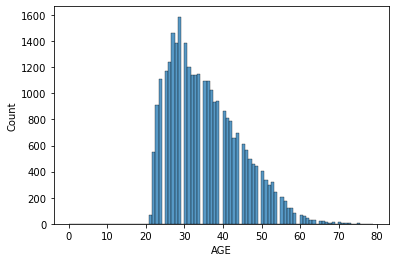

In [19]:
sns.histplot(new_df.AGE)

In [20]:
print(f"média: {new_df.AGE.mean()}")
print(f"variância: {new_df.AGE.var()}")

média: 35.484260602584435
variância: 84.94305984111936


A variável AGE tem assimetria a direita.

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

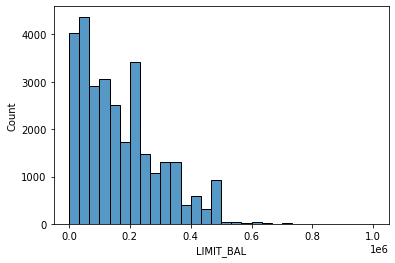

In [21]:
sns.histplot(new_df['LIMIT_BAL'], bins=30)

In [22]:
print(f"média: {new_df['LIMIT_BAL'].mean()}")
print(f"variância: {new_df['LIMIT_BAL'].var()}")

média: 167444.90974729243
variância: 16828294661.581251


Variável `LIMIT_BAL` também tem assimetria a direita. 

2. Verifique a integridade da variavel indicadora `EDUCATION`. Faça o mesmo para `MARRIAGE`.

<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

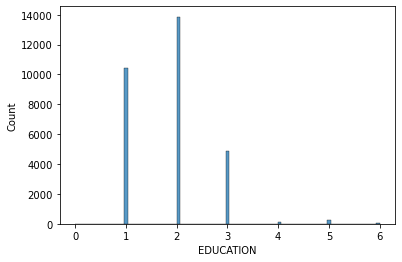

In [23]:
sns.histplot(new_df.EDUCATION)

In [39]:
new_df.EDUCATION.value_counts()

2    13869
1    10445
3     4864
5      275
4      122
6       49
0       15
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='Count'>

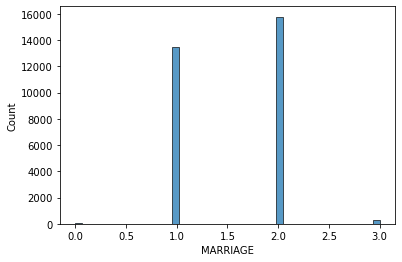

In [24]:
sns.histplot(new_df.MARRIAGE)

In [25]:
new_df.MARRIAGE.value_counts()

2    15783
1    13483
3      318
0       55
Name: MARRIAGE, dtype: int64

As duas variáveis tem valores zero, que por sua vez não tem descrição. Possivelmente faltantes pois essas duas variáveis contém a alternativa "outros" que poderia englobar ocasiões atípicas.

## Exercício 5
Realize o one-hot encoding para a variável `EDUCATION`.

In [26]:
encoder = OneHotEncoder(sparse=False)
dummies = encoder.fit_transform(new_df.EDUCATION.to_numpy().reshape(-1,1))

In [27]:
dummies_columns = encoder.get_feature_names_out(["EDUCATION"])

In [28]:
dummies_df = pd.DataFrame(dummies, columns=dummies_columns)

In [29]:
dummies_df.head()

,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
df_with_edu_dummies = pd.concat([new_df,dummies_df], axis=1).drop("EDUCATION", axis=1)

## Exercício 6
Analise `PAY_3` e `PAY_2` e verifique se as informações nelas contidas estão condizentes. Avalie se
poderão ser utilizadas no modelo preditivo.

In [31]:
new_df.PAY_2.value_counts()

 0    15564
-1     5984
 2     3877
-2     3705
 3      325
 4       99
 1       28
 5       24
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [32]:
new_df.PAY_3.value_counts()

 0    15600
-1     5865
-2     4004
 2     3782
 3      237
 4       73
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

As informações não estão condizentes com a descrição. Mas se levarmos a análise da variável `PAY_1` em conta e assumir que os valores 0 (dados faltantes) e -2 (fatura vazia) são validos, então teremos informações úteis para o modelo.

## Exercício 7
1. Plote os histogramas de `PAY_1`, ..., `PAY_6`; calcule suas médias, variâncias, e valores máximos e mínimos.

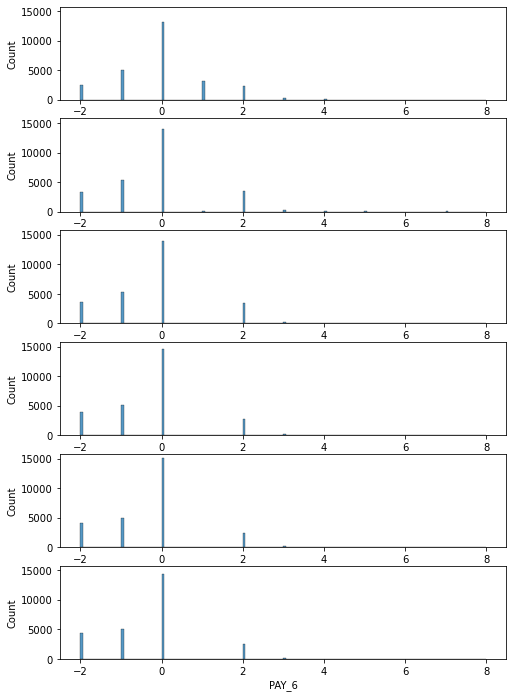

In [56]:
# Para PAY_1 é necessário remover os valores faltantes
df_aux = new_df.query(f"PAY_1 != 'Not available'")
df_aux.PAY_1 = df_aux.PAY_1.astype(int) 

plt.rcParams['figure.figsize'] = [8,12]
fig, axes = plt.subplots(6,1, sharey=True)
for ax, column in zip(axes, np.arange(1,7)):
    sns.histplot(df_aux.query(f"PAY_1 != 'Not available'")[f"PAY_{column}"], ax=ax)

In [43]:
df_aux[[f"PAY_{i}" for i in np.arange(1,7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000
mean,-0.017619,-0.130471,-0.164882,-0.222322,-0.267140,-0.290995
std,1.126207,1.197335,1.197703,1.166477,1.130313,1.148916
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [44]:
print("Variâncias")
print(df_aux[[f"PAY_{i}" for i in np.arange(1,7)]].describe().loc['std',:]**2)

Variâncias
PAY_1    1.268342
PAY_2    1.433612
PAY_3    1.434493
PAY_4    1.360669
PAY_5    1.277608
PAY_6    1.320007
Name: std, dtype: float64


2. Faça o mesmo para `BILL AMT_n`, n = 1, ..., 6

In [51]:
plt.rcParams['figure.figsize'] = [8,5]

In [72]:
def make_hist_and_get_stats(df, column_radical):
    plt.rcParams['figure.figsize'] = [8,12]
    fig, axes = plt.subplots(6,1, sharey=True)
    for ax, column in zip(axes, np.arange(1,7)):
        sns.histplot(df[f"{column_radical}{column}"], ax=ax)
    stats = df[[f"{column_radical}{i}" for i in np.arange(1,7)]].describe()
    return fig, stats, stats.loc['std',:]**2

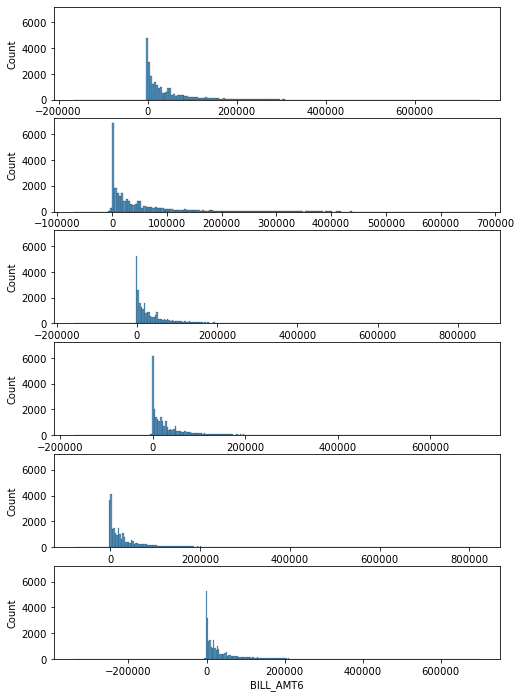

In [73]:
fig, stats, var = make_hist_and_get_stats(new_df, "BILL_AMT")

In [74]:
stats

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000
mean,51492.368797,49383.173711,47105.668583,43411.989368,40406.158684,38955.445997
std,73665.717118,70965.608498,68736.289960,64304.945819,60734.667790,59461.335462
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3638.500000,3070.500000,2683.000000,2395.000000,1776.500000,1270.500000
50%,22453.000000,21267.000000,20135.000000,19089.000000,18100.000000,17077.000000
75%,67757.000000,64494.500000,60405.000000,54872.000000,50372.000000,49316.500000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [75]:
var

BILL_AMT1    5.426638e+09
BILL_AMT2    5.036118e+09
BILL_AMT3    4.724678e+09
BILL_AMT4    4.135126e+09
BILL_AMT5    3.688700e+09
BILL_AMT6    3.535650e+09
Name: std, dtype: float64

3. Faça o mesmo para `PAY_AMT_n`, n = 1, ..., 6.

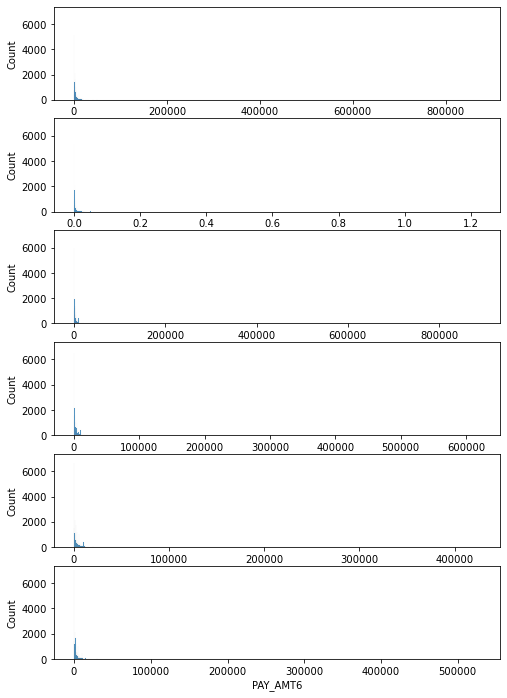

In [76]:
fig, stats, var = make_hist_and_get_stats(new_df, "PAY_AMT")

In [77]:
stats

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26619.000000,2.661900e+04,26619.000000,26619.000000,26619.000000,26619.000000
mean,5713.620121,5.890943e+03,5268.297757,4895.201848,4851.809873,5266.623014
std,16711.894066,2.123088e+04,17278.702252,15968.595065,15323.393749,17649.072172
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.270000e+02,393.500000,300.000000,255.500000,129.500000
50%,2124.000000,2.009000e+03,1832.000000,1500.000000,1500.000000,1500.000000
75%,5032.000000,5.000000e+03,4579.000000,4059.500000,4096.000000,4025.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [78]:
var

PAY_AMT1    2.792874e+08
PAY_AMT2    4.507504e+08
PAY_AMT3    2.985536e+08
PAY_AMT4    2.549960e+08
PAY_AMT5    2.348064e+08
PAY_AMT6    3.114897e+08
Name: std, dtype: float64

4. Repita o passo anterior eliminando as ocorrências nulas e aplicando log10 aos pagamentos não-nulos. 

In [79]:
def aplica_log10(value):
    if value == 0:
        return 0
    else:
        return np.log10(value)

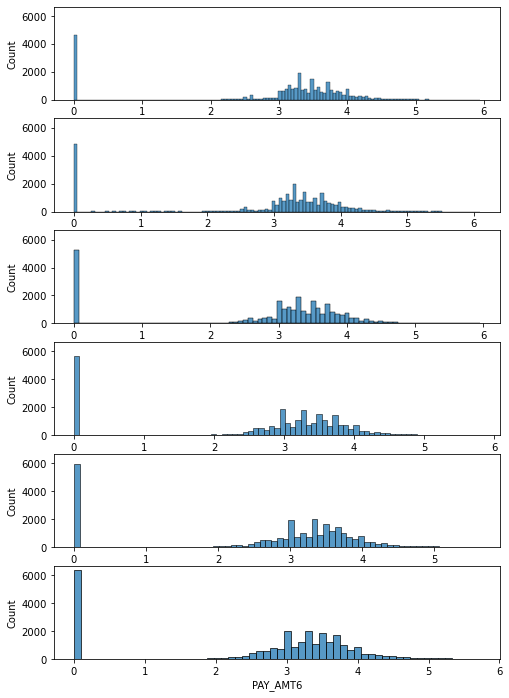

In [81]:
column_radical = "PAY_AMT"
fig, stats, var = make_hist_and_get_stats(
    new_df[[f"{column_radical}{i}" for i in np.arange(1,7)]].applymap(aplica_log10), 
    column_radical
)

In [82]:
stats

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000,26619.000000
mean,2.885784,2.849465,2.735889,2.644261,2.622285,2.580872
std,1.409628,1.425867,1.453011,1.475472,1.497253,1.532415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.917506,2.594944,2.477121,2.407390,2.112267
50%,3.327155,3.302980,3.262925,3.176091,3.176091,3.176091
75%,3.701741,3.698970,3.660771,3.608473,3.612360,3.604766
max,5.941289,6.088874,5.948923,5.793092,5.629949,5.723181


In [83]:
stats.loc['std',:]**2

PAY_AMT1    1.987051
PAY_AMT2    2.033097
PAY_AMT3    2.111241
PAY_AMT4    2.177017
PAY_AMT5    2.241768
PAY_AMT6    2.348297
Name: std, dtype: float64